In [1]:
# We will first import our required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We will now read the student data and determine what are the features to consider 

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We can now see how our data looks like .
We will be predicting the 'charges' based on the features 
The charges here represent the medical charges for a given person 

Lets see how we can visualise the data , in order to get some insights on the relation

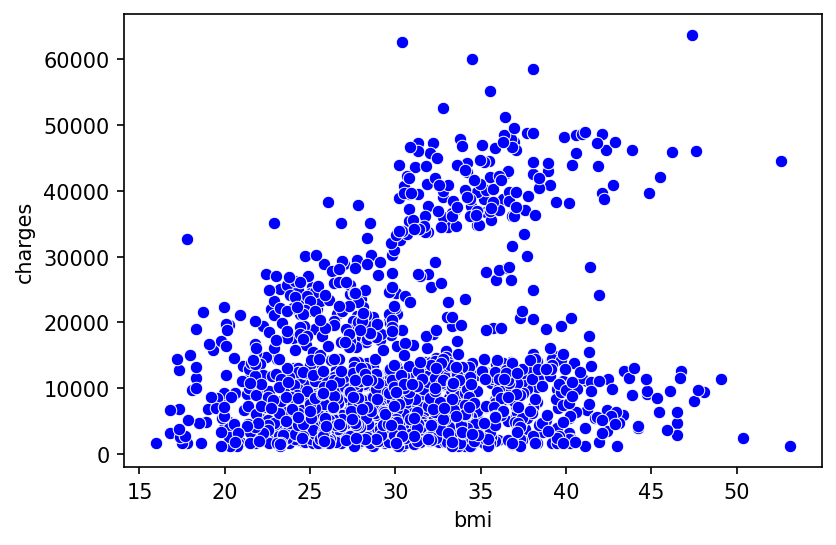

In [6]:
plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data=df,x='bmi',y='charges',color='blue')

From this plot we can see that even with increased bmi , the charges are mostly between 0-30000
But there are some points that are located high on the charges axis 
Lets explore the other factors

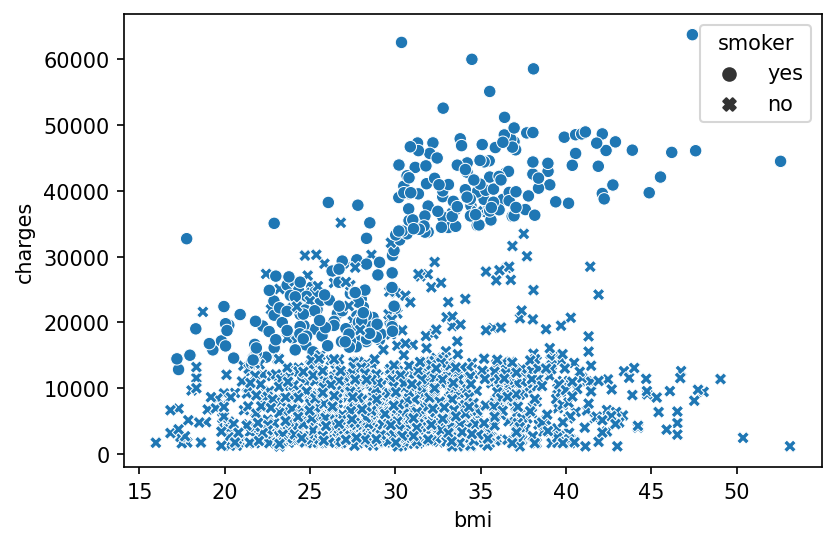

In [7]:
plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data=df,x='bmi',y='charges',style='smoker')

Now we can see that smokers seem to have a higher charge 

In [8]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [9]:
# there are four "region" found in the dataset , also lets see how charges vary as per region 

<Figure size 900x600 with 0 Axes>

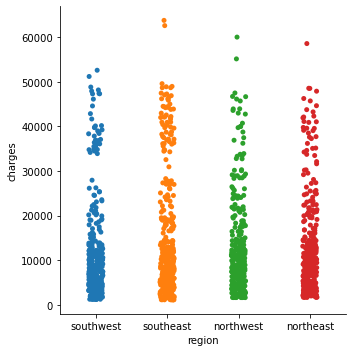

In [10]:
plt.figure(figsize=(6,4),dpi=150)
sns.catplot(data=df, x='region', y="charges")

In [11]:
#The charge doesnt seem to vary much based on regions , southeast seems to have some extreme cases

<Figure size 900x600 with 0 Axes>

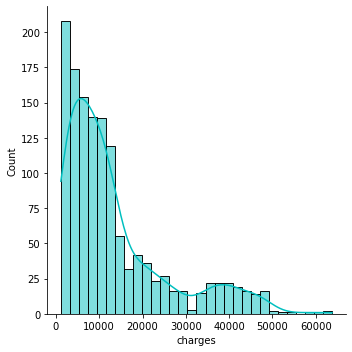

In [12]:
plt.figure(figsize=(6,4),dpi=150)
sns.displot(df['charges'], kde = True, color='c')

In [13]:
# This is a distribution plot for the charges , it seems most cases range between 0-20000

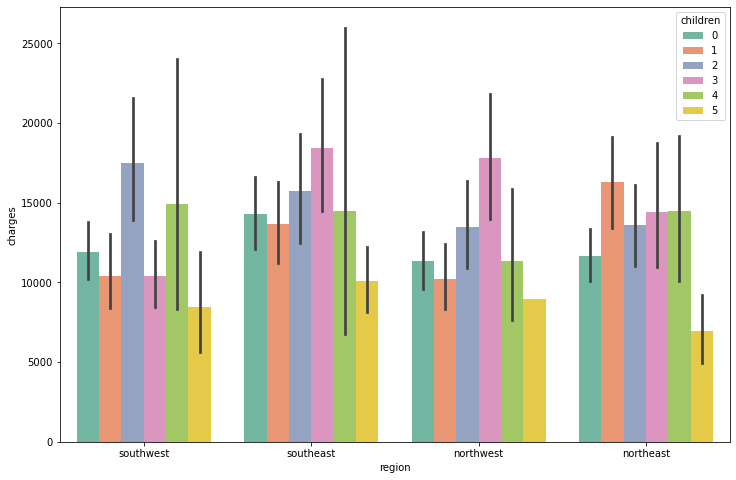

In [14]:
figure, axes = plt.subplots(1, 1, figsize=(12, 8))
axes = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set2')

In [15]:
#people with children tend to have higher medical costs overall as well like 3 or more

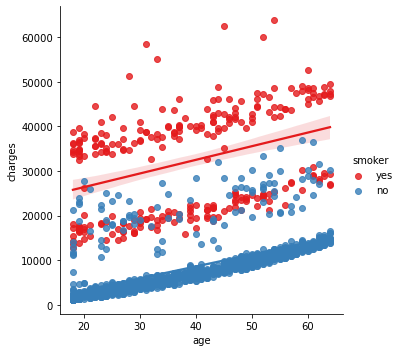

In [16]:
axes = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')

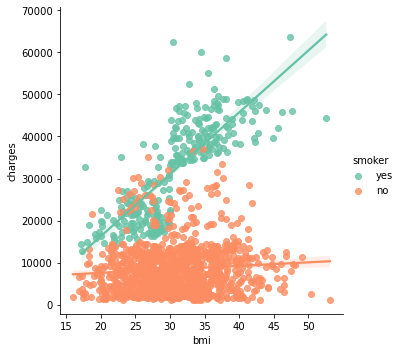

In [17]:
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')

The above last two plots show that with increase in age there is a steady increase in charges 
and also smokers seem to have incur a higher medical charge.

Also Bmi seem to have significant impact on charges , but smoking seems to be the most significant factor for increased
medical charges

Now we have to check for null values and get our data types right
So that we can apply Linear Regression to it

In [18]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
# Hence there are no null values 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [21]:
# Note the columns 'sex','smoker','region' are not numeric/categorical , they are objects
#so we will have to convert them into categories

In [22]:

df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


In [24]:
#Now we have converted them into cetegories

In [25]:
# Now we will use scikit learns preprocessing library to get the data in the categorical columns encoded

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
encoder_d = LabelEncoder()

In [28]:
#This is the encoder object

In [29]:
encoder_d.fit(df.sex.drop_duplicates())
df.sex = encoder_d.transform(df.sex)
encoder_d.fit(df.smoker.drop_duplicates())
df.smoker = encoder_d.transform(df.smoker)
encoder_d.fit(df.region.drop_duplicates())
df.region = encoder_d.transform(df.region)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [31]:
# Now data is in the desired state 

We now need to jump into the Regression part 

In [32]:
X=df.drop("charges",axis=1)

In [33]:
y=df['charges']

We will now split the data into training and test sets using
Scikit Learn's train_test_split , and then scale the data
i.e standardize the data

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler=StandardScaler()

In [38]:
scaled_X_train=scaler.fit_transform(X_train)

In [39]:
scaled_X_test=scaler.transform(X_test)

In [40]:
#Note we never fit on test data, sp that it doesn't gets a prior information of the test set

We will use the Lasso or L1 regression 


In [50]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV,RepeatedKFold

In [51]:
lasso = Lasso()

In [100]:
#GridSearchCV implements a “fit” and a “score” method. 
#It takes in the estimator(here Lasso()),alpha values to test and cross validation folds as cv
#It also uses a scoring parameter besed on which the model is fitted

In [101]:
cv=RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [102]:
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)

In [103]:
grid_search=GridSearchCV(lasso, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [104]:
model=grid_search.fit(scaled_X_train,y_train)

In [105]:
model.best_params_

{'alpha': 0.99}

In [106]:
# Now lets test 

In [107]:
y_pred=model.predict(scaled_X_test)

In [108]:
mae=mean_absolute_error(y_test,y_pred)

In [109]:
mae

4155.060660248761

In [110]:
# Now we have a mean absolute error of 4155 approx 

In [111]:
model.fit(X,y)

C:\Users\sapch\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\sapch\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\sapch\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24437004463.521584, tolerance: 19607422.156836715
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])},
             scoring='neg_mean_absolute_error')

In [112]:
yhat=model.predict(X)

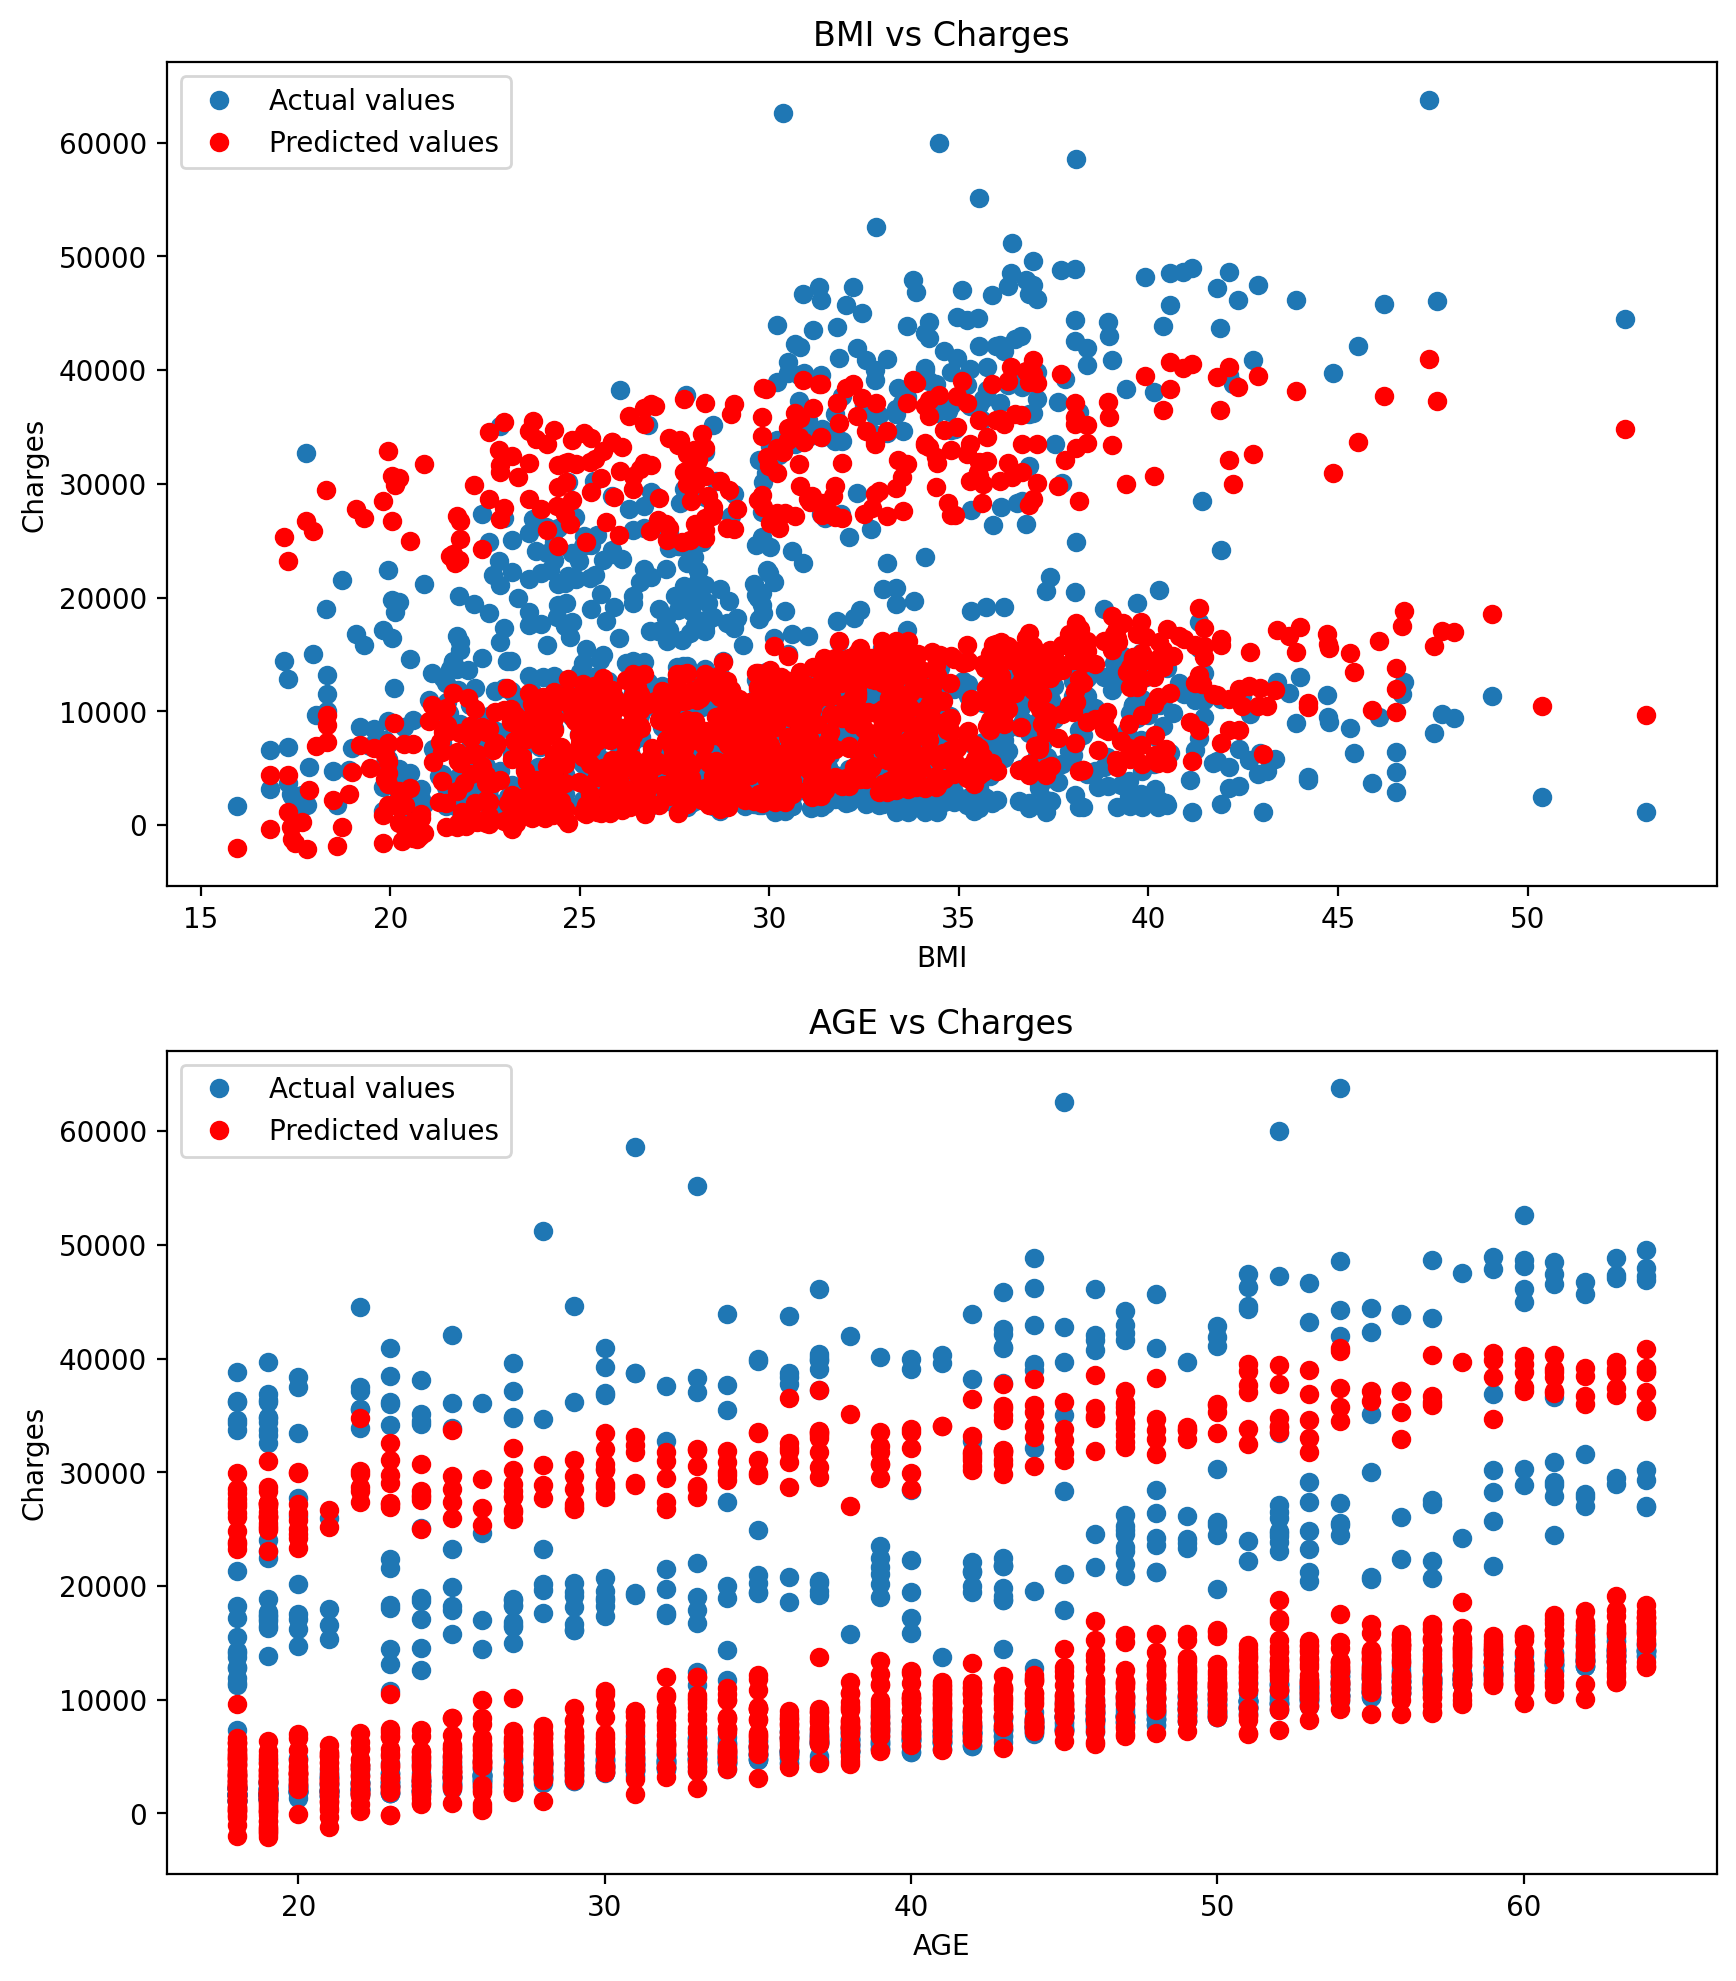

In [113]:

fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(10,12),dpi=200)
axes[0].plot(X['bmi'],y,'o',label='Actual values')
axes[0].plot(X['bmi'],yhat,'o',color='red',label='Predicted values')
axes[0].set_ylabel("Charges")
axes[0].set_xlabel('BMI')
axes[0].set_title("BMI vs Charges")
axes[0].legend(loc ="upper left")

axes[1].plot(X['age'],y,'o',label='Actual values')
axes[1].plot(X['age'],yhat,'o',color='red',label='Predicted values')
axes[1].set_ylabel("Charges")
axes[1].set_xlabel('AGE')
axes[1].set_title("AGE vs Charges")
axes[1].legend(loc ="upper left")

In [98]:
model.best_estimator_.coef_

array([  257.28807486,  -131.11057962,   332.57013224,   479.36939355,
       23820.43412267,  -353.64001656])

In [99]:
# These were the beta coefficients of the model 

Now we will save the model 

In [115]:
from joblib import dump,load

In [116]:
dump(model,'Medical_cost.joblib')

['Medical_cost.joblib']

We can later load this model from joblib as ;

model=load('Features3Predictor.joblib')